## Семинар 11

# Тема: Многоклассовая и полиномиальная классификация

Для многоклассовой классификации метрика accuracy вычисляется аналогично тому, как и в бинарной классификации. А метрики precision, recall и F1-меру нужно брать усреднёнными, указав способ усреднения: average='macro' или 'wheight'.

Можно строить полиномиальные модели классификации разных степеней путём обучения модели логистической регрессии на полиномиальных данных. 

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import time
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score, classification_report
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification, load_iris

Сгенерируем данные и значения целевой переменной для задачи многоклассовой классификации:

In [2]:
X, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=3, 
                           n_clusters_per_class = 1, 
                           class_sep=3,
                           random_state=0)

Выведем их в виде датафрейма, дав названия колонкам:

In [3]:
df = pd.DataFrame(data =X, columns = ['x'+str(i) for i in range(1,3)])
df['y'] = y
df.head()

,x1,x2,y
0,2.407448,-2.764747,0
1,3.921765,2.759140,1
2,2.581345,2.396164,1
3,3.431664,2.693400,1
4,4.208167,-4.953762,0


Визуализируем данные на диаграмме рассеивания, подкрасив классы разными цветами:

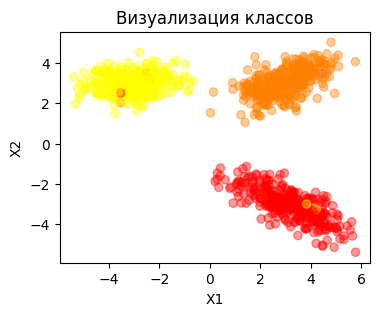

In [4]:
plt.figure(figsize = (4,3))
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

Разделим данные на обучающую и тестовую части:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

Реализуем модель логистической регрессии LogisticRegression на `sklearn`. Для этого обучим модель на обучающих данных:

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Выведим коэффициенты гиперплоскостей:

In [7]:
model.intercept_

array([ 1.14215434, -1.14811329,  0.00595895])

In [8]:
model.coef_

array([[-0.03710893, -1.07819463],
       [ 0.92395233,  0.83689366],
       [-0.8868434 ,  0.24130097]])

Визуализируем области разделения на классы для тестовых данных:

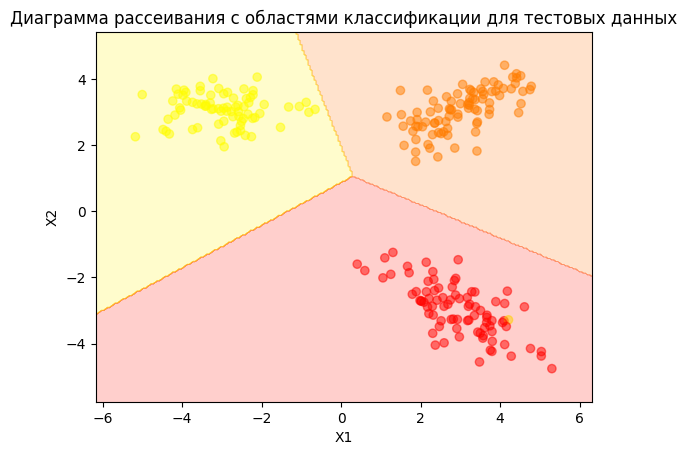

In [9]:
X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

plt.scatter(X_test[:, 0], X_test[:, 1],  c=y_test, cmap='autumn', alpha = 0.5)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Диаграмма рассеивания с областями классификации для тестовых данных")
plt.show()

Сделаем прогноз на тестовой выборке:

In [10]:
y_test_pred = model.predict(X_test)

Вычислим метрики качества:

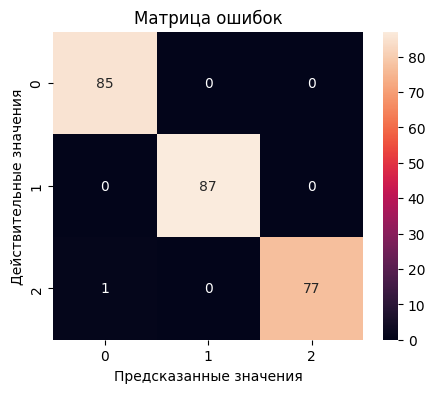

In [11]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

Метрика accuracy:

In [12]:
accuracy_score(y_test, y_test_pred)

0.996

Метрика $F_1$ - мера, которая вычисляется с указанием способа усреднения: 

In [13]:
f1_score(y_test, y_test_pred, average='macro')

0.9959001446268

Выведем отчёт о классификации и сделаем вывод о качестве модели:

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      1.00      1.00        87
           2       1.00      0.99      0.99        78

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Модель классифицирует данные с высокой точностью, которая составляет 99%.

## Задания для самостоятельного выполнения:

### 1. Загрузите встроенный датасет _iris_. Выведите его описание. Возьмите в качестве _X_ только второй и четвёртый столбцы признаков, а целевую переменную обозначьте за _y_. Выведите признаки вместе с целевой переменной в виде датафрейма с соответствующими названиями колонок. Выведите размеры полученного датафрейма, убедитесь, что в данных нет пропущенных значений. Убедитесь, что целевая переменная содержит три значения и определите сколько объектов в каждом классе.
Указание: Для загрузки датасета напишите iris = load_iris(). Для определения количества объектов в каждом классе используйте метод _.value_counts()_ библиотеки _pandas_.

In [15]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = pd.concat([df.iloc[:, 1], df.iloc[:, 3]], axis=1)
df.head()

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [17]:
# Create a DataFrame for the target labels
target_df = pd.DataFrame(iris.target, columns=['target'])

# Concatenate with the target labels
df = pd.concat([df, target_df], axis=1)
df

,sepal width (cm),petal width (cm),target
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [18]:
df.shape

(150, 3)

In [19]:
df.isnull().sum()

sepal width (cm)    0
petal width (cm)    0
target              0
dtype: int64

In [20]:
df['target'].unique()

array([0, 1, 2])

In [21]:
for column in df.columns:
    print(df[column].value_counts(), end='\n\n')

sepal width (cm)
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

petal width (cm)
0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

target
0    50
1    50
2    50
Name: count, dtype: int64



### 2. Визуализируйте данные на диаграмме рассеяния, подкрасив классы разными цветами. Подпишите классы.

In [22]:
df

,sepal width (cm),petal width (cm),target
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


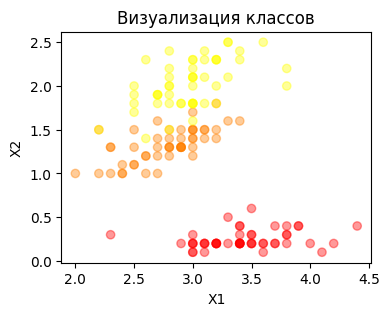

In [23]:
plt.figure(figsize = (4,3))
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'],  c=df['target'], cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

In [24]:
df_data = np.array(df[['sepal width (cm)', 'petal width (cm)']])

In [25]:
target = df['target']
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### 3. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав random_state=1. Выведите получившиеся размеры обучающей и тестовой выборок. Визуализируйте тестовые данные на диаграмме рассеивания.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size = 0.25, random_state=1)

In [27]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [28]:
y_train.shape, y_test.shape

((112,), (38,))

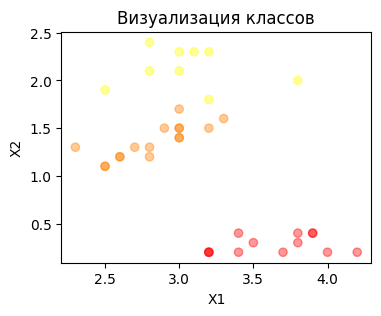

In [29]:
plt.figure(figsize = (4,3))
plt.scatter(X_test[:,0], X_test[:,1],  c=y_test, cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

### 4. Реализуйте модель логистической регрессии LogisticRegression из _sklearn_ на этих данных. Выведите коэффициенты, полученных гиперплоскостей.

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.intercept_

array([ 0.01657584,  3.39281558, -3.40939141])

In [32]:
model.coef_

array([[ 1.20976171, -3.3709351 ],
       [-0.78155169, -0.14687237],
       [-0.42821002,  3.51780748]])

### 5. Напечатайте уравнения прямых разделения на классы, полученных в результате применения модели логистической регрессии к рассматриваемым данным.
Указание: Используйте print. Уравнения прямых должны иметь вид $w_{01} + w_{11} x_1  + w_{21} x_2 = 0$, $w_{02} + w_{12} x_1  + w_{22} x_2 = 0$, $w_{03} + w_{13} x_1  + w_{23} x_2 = 0$. Выводите коэффициенты с точностью два знака после запятой. Учтите то, что эти коэффициенты могут быть и отрицательными. 

In [33]:
coefs = [model.coef_[:, 0], model.coef_[:, 1]]

for coef in coefs:
    result = f'{coef[0]:.2f}'
    for i in range(1, len(coef)):
        if coef[i] > 0:
            result += f' + {coef[i]:.2f}*x{i}'
        else:
            result += f' {coef[i]:.2f}*x{i}'
    print(f'{result} = 0')

1.21 -0.78*x1 -0.43*x2 = 0
-3.37 -0.15*x1 + 3.52*x2 = 0


### 6. Визуализируйте области разделения на классы для тестовых данных.

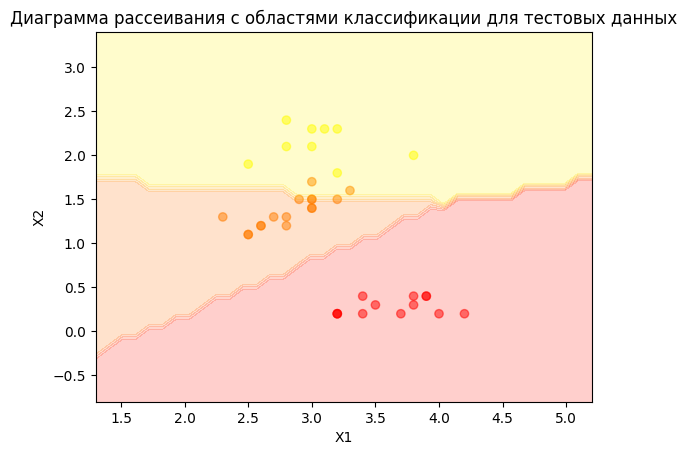

In [34]:
X0 = np.linspace(X_test[:, 0].min()-1,X_test[:, 0].max()+1, X_test.shape[0])
X1 = np.linspace(X_test[:, 1].min()-1,X_test[:, 1].max()+1, X_test.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = model.predict(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

plt.scatter(X_test[:, 0], X_test[:, 1],  c=y_test, cmap='autumn', alpha = 0.5)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
#plt.pcolormesh(X0_grid, X1_grid, Z_grid, cmap='autumn', alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Диаграмма рассеивания с областями классификации для тестовых данных")
plt.show()

### 7. Сделайте предсказание на тестовых данных и выведите матрицу ошибок классификации. Найдите общее количество сделанных ошибок.

In [35]:
y_test_pred = model.predict(X_test)

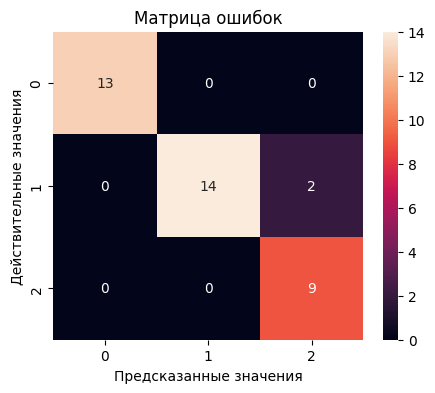

In [36]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()



### 8. Вычислите метрики качества построенной модели: accuracy, precision, recall и f1.
Указание: Для многоклассовой классификации эти метрики нужно брать усреднёнными, указав способ усреднения: average='macro' или 'wheight'.

In [37]:
accuracy_score(y_test, y_test_pred)

0.9473684210526315

In [38]:
f1_score(y_test, y_test_pred, average='macro')

0.9444444444444445

### 9. Выведите отчёт о классификации. Сделайте вывод о качестве модели.

In [1]:
print(classification_report(y_test, y_test_pred))

NameError: name 'classification_report' is not defined

### 10. Из обучающих данных X_train, получите полиномиальные данные 2 степени. Запишите, полученные полиномиальные обучающие данные в датафрейм с названиями колонок $x_1$, $x_2$, ${x_1}^2$, $x_1 x_2$ и ${x_2}^2$. Из тестовых данных X_test, получите полиномиальные тестовые данные аналогичным образом.

In [40]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
df_train_poly = pd.DataFrame(X_train_poly, columns=['W0', 'X1', 'X2', 'X1^2', 'X1,2', 'X2^2'])

In [42]:
df_train_poly

,W0,X1,X2,X1^2,"X1,2",X2^2
0,1.0,2.8,1.5,7.84,4.20,2.25
1,1.0,2.5,1.8,6.25,4.50,3.24
2,1.0,3.0,2.1,9.00,6.30,4.41
3,1.0,3.5,0.3,12.25,1.05,0.09
4,1.0,2.2,1.5,4.84,3.30,2.25
...,...,...,...,...,...,...
107,1.0,2.8,1.5,7.84,4.20,2.25
108,1.0,3.1,1.8,9.61,5.58,3.24
109,1.0,2.5,1.5,6.25,3.75,2.25
110,1.0,3.1,2.4,9.61,7.44,5.76


In [43]:
df_test_poly = pd.DataFrame(X_test_poly, columns=['W0', 'X1', 'X2', 'X1^2', 'X1,2', 'X2^2'])
df_test_poly

,W0,X1,X2,X1^2,"X1,2",X2^2
0,1.0,4.0,0.2,16.00,0.80,0.04
1,1.0,2.5,1.1,6.25,2.75,1.21
2,1.0,3.0,1.4,9.00,4.20,1.96
3,1.0,3.9,0.4,15.21,1.56,0.16
4,1.0,3.8,2.0,14.44,7.60,4.00
5,1.0,3.3,1.6,10.89,5.28,2.56
6,1.0,3.1,2.3,9.61,7.13,5.29
7,1.0,3.8,0.4,14.44,1.52,0.16
8,1.0,3.2,0.2,10.24,0.64,0.04
9,1.0,3.2,2.3,10.24,7.36,5.29


### 11. Масштабируйте полиномиальные обучающие и тестовые данные методом стандартной нормализации.

In [44]:
scaler = StandardScaler()
# Масштабирование обучающих данных
X_train_scaled = scaler.fit_transform(df_train_poly)

# Масштабирование тестовых данных
X_test_scaled = scaler.transform(df_test_poly)

### 12. Постойте полиномиальную модель логистической регрессии второй степени, т.е. обучите модель логистической регрессии на масштабированных полиномиальных данных. Сделайте предсказания на соответствующих тестовых данных и найти количество сделанных ошибок. 

In [45]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
y_test_scaled_pred = model.predict(X_test_scaled)

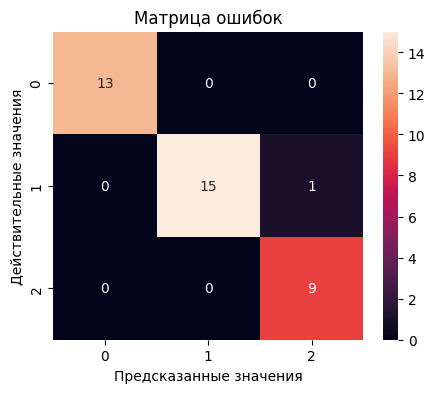

In [47]:
plt.figure(figsize = (5,4))
plt.title("Матрица ошибок")
sns.heatmap(confusion_matrix(y_test, y_test_scaled_pred), annot=True, fmt ='d')
plt.xlabel('Предсказанные значения')
plt.ylabel('Действительные значения')
plt.show()

### 13. Оцените качество построенной полиномиальной модели. Для этого выведите матрицу ошибок, метрики accuracy и F1, а также отчёт о классификации. Сделайте вывод о том, какая модель классифицирует данные лучше: логистическая регрессия или полиномиальная второй степени? 

In [48]:
accuracy_score(y_test, y_test_scaled_pred)

0.9736842105263158

In [49]:
f1_score(y_test, y_test_scaled_pred, average='macro')

0.9717034521788341

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



### 14. Визуализируйте получившиеся при помощи полиномиальной модели области разделения на классы для тестовых данных.

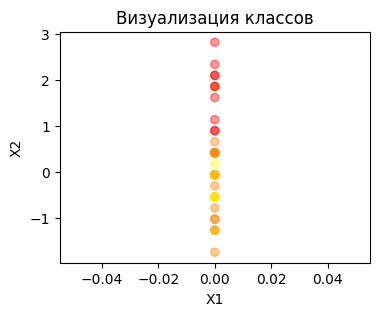

In [53]:
plt.figure(figsize = (4,3))
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1],  c=y_test, cmap='autumn', alpha = 0.4)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Визуализация классов")
plt.show()

 ### 15. Возьмите в качестве _X_ все столбцы признаков датасета _iris_, а целевую переменную обозначьте за _y_. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=1. Выведите получившиеся размеры обучающей и тестовой выборок. Масштабируйте обучающие и тестовые данные методом стандартной нормализации.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size = 0.2, random_state=1)

In [55]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [56]:
y_train.shape, y_test.shape

((120,), (30,))

In [57]:
scaler = StandardScaler()
# Масштабирование обучающих данных
X_train_scaled = scaler.fit_transform(X_train)

# Масштабирование тестовых данных
X_test_scaled = scaler.transform(X_test)

### 16. Постройте модель логистической регрессии на всём датасете _iris_ на предварительно масштабированных данных. Оцените качество построенной модели.

In [60]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
accuracy_score(model.predict(X_test_scaled), y_test)

0.9666666666666667

### 17. Постройте модель полиномиальной классификации третьей степени на всём датасете _iris_, используя конвейер. Оцените качество построенной модели.

In [76]:
# Создание конвейера с полиномиальными признаками и SVM
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),  # Полиномиальные признаки 3-й степени
    ("scaler", StandardScaler()),                      # Стандартизация данных
    ("svm_clf", SVC(kernel="poly", degree=3))        # Классификатор SVM с полиномиальным ядром
])

In [78]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler())])

In [79]:
# Прогнозирование на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

AttributeError: This 'Pipeline' has no attribute 'predict'

### 18. Замерьте и сравните временя обучения построенных моделей логистической регрессии на масштабированных данных и полиномиальной третьей степени.